In [1]:

#Campaign for selling personal loans.

#This case is about a bank (Thera Bank) which has a growing customer base. 
#Majority of these customers are liability customers (depositors) with varying size of deposits. 
#The number of customers who are also borrowers (asset customers) is quite small, 
#and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through
#the interest on loans. In particular, the management wants to explore ways of converting its liability customers to 
#personal loan customers (while retaining them as depositors). 

#A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. 
#This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

#The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. 
#This will increase the success ratio while at the same time reduce the cost of the campaign.

#The file below contains data on 5000 customers. 
#The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), 
#and the customer response to the last personal loan campaign (Personal Loan). 
# Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [2]:
#Question 1 : Read the column description and ensure you understand each attribute well.

# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Load data
customerdf = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
customerdf.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [3]:
customerdf.info()
# Inference :

#All features are numeric.No conversion/encoding required.However, when looked at data description, we can make out that, below
# listed attributes are categorical
#1.Education 2. Personal Loan 3. Securities Account 4. CD Account 5. Online 6.CreditCard

# There are no empty data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
customerdf.describe()
#Inference :
# Experience feature is having -3 as min value.This could be a wrong entry. this needs to be handled.There are multiple negative data pints. 
# We see outliers in Income, CCAvg, mortgage features. This will be verified / confirmed in further EDA steps.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
# Treating negative values in Experience feature using .abs method 
customerdf["Experience"] = customerdf["Experience"].abs()
customerdf.describe()

# post converting to abs values, in Experience column we are seeing min as 0 which is incorrect again.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
customerdf["Experience"].value_counts() 
# There are 66 data points with 0 years of professional experience which again is incorrect data.This needs to be handled too.

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
34    125
27    125
17    125
22    124
29    124
7     121
6     119
8     119
15    119
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

In [7]:
# Replacing 0s in Experience feature with mean.
MeanExp = int(customerdf["Experience"].mean())
print("Mean Experience",MeanExp)
customerdf["Experience"] = customerdf["Experience"].replace(0,MeanExp)
#customerdf["Experience"].value_counts() 
customerdf.describe()   # Post mean imputation, data distribution of Experience feature remains almost same as before.

Mean Experience 20


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.398600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.175182,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,1.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2E31A9F60>,
      dtype=object)

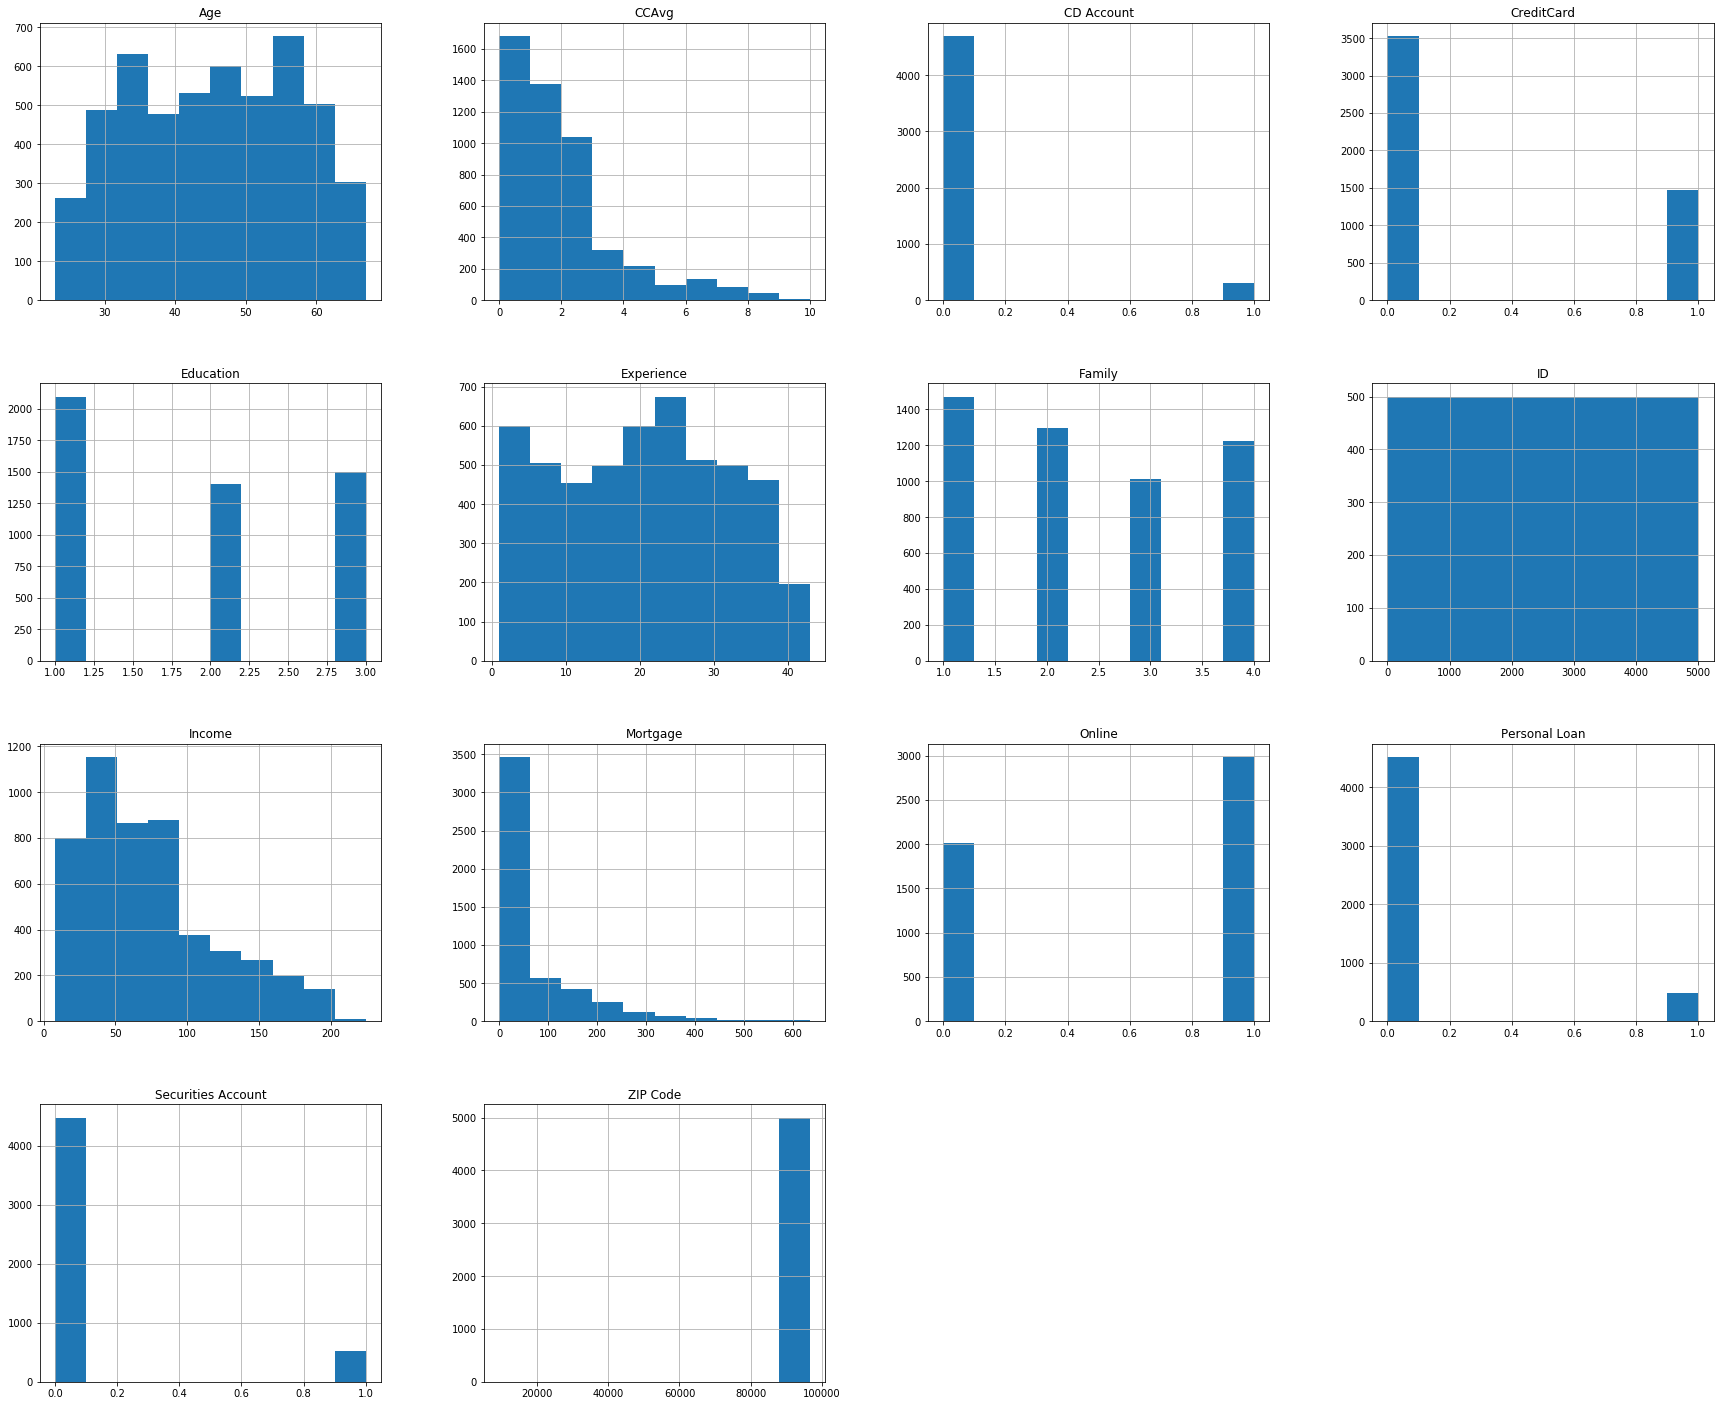

In [8]:
#Question 2 :
#Study the data distribution in each attribute, share your findings. 
customerdf.hist(figsize = (30,25)) # plotting histogram to understand the distribution of each feature

#Inference :
#Age : This feature has dense distribution in range 35 - 55. 
#CCAvg : This has skewed distribution, with outliers.
#CD Account:less than 5% of customers are having CD Account
#CreditCard : CLose to 70% of customers are not using Credit card.
#Education : customers belong to 3 separate categories
# Experience : This has a good distribution across 1 - 35 years of experience
# Family : Data is distributed in 4 sub categories under family
# Income :This has skewed distribution, with outliers
# Mortgage :This has skewed distribution, with outliers
# Online : There is almost equal presence of online & offline customers.
# Personal Loan :Less than 10% of customers have availed personal loan
# Securities Account :Customers with Securities account is very significantly less.


C:\Users\Aadee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Aadee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


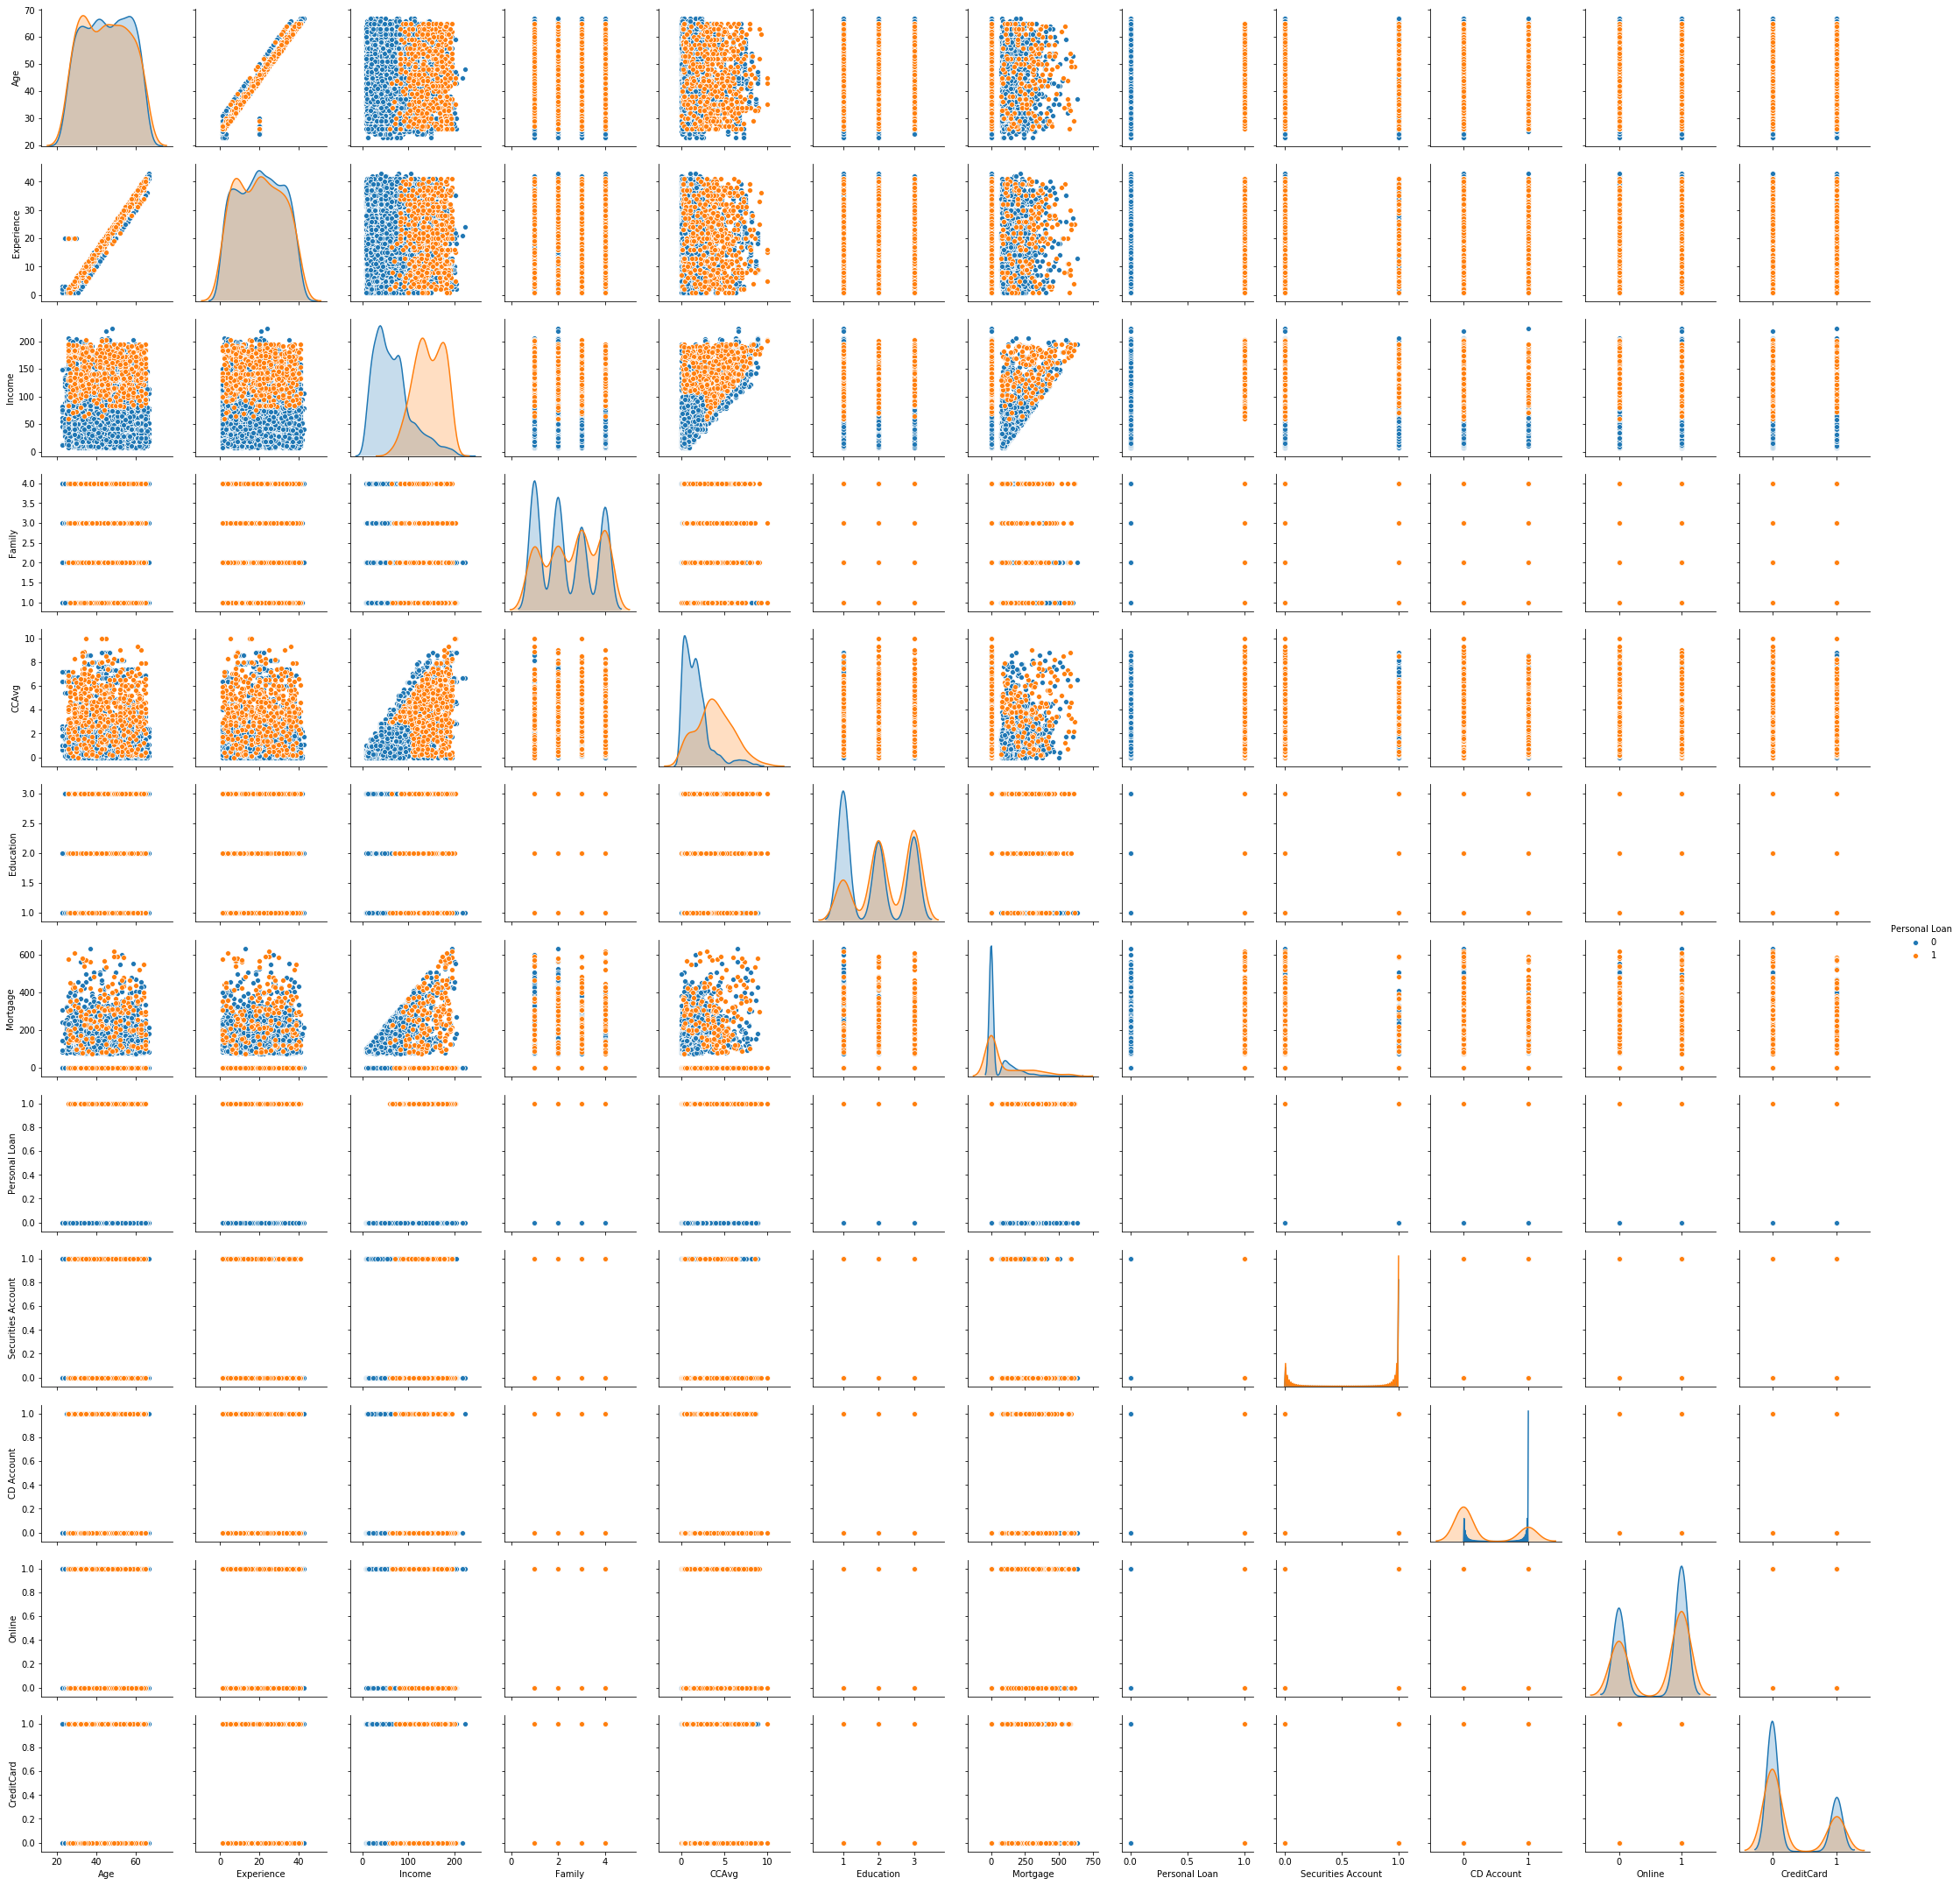

In [9]:
customerdf_attr = customerdf.drop(["ID","ZIP Code"],axis=1)
sns.pairplot(customerdf_attr, diag_kind='kde', hue = "Personal Loan") # plotting all variables.

#Inference:
#1. Age & Experience are strongly positively corelated.
#2. Customers with higher income & higher experience have availed personal loan as per this data set.
#3. Customers Higher Income & higher CCAvg have availed personal loan as per this data set.
#4. Customer with higher mortages & higher income have availed personal loan

In [10]:
# Observing corelation matrix to validate inferences from above pairplot numerically
corr = customerdf_attr.corr()
corr

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.974728,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.974728,1.000000,-0.049998,-0.044905,-0.050319,0.022681,-0.014911,-0.007675,0.000289,0.006959,0.008231,0.005581
Income,-0.055269,-0.049998,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.044905,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050319,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.022681,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.014911,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007675,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,0.000289,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.006959,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


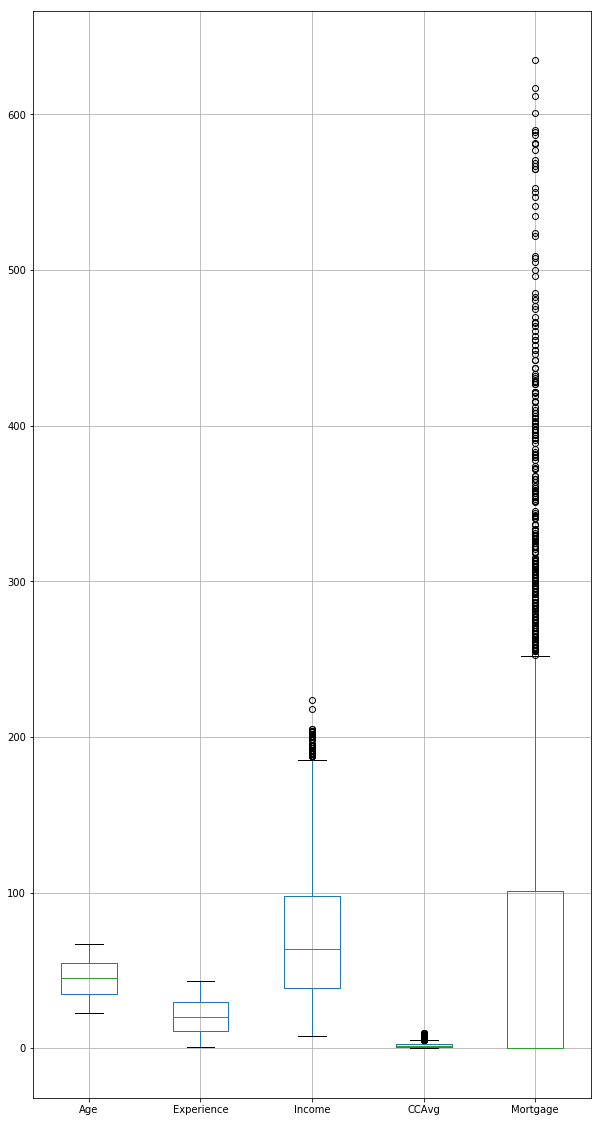

In [11]:
#plotting box plot to understand outlier presence & to see if any outlier treatment is required as we are using KNN algorithm 
# which is susciptible to outliers.

bbx = customerdf.boxplot(column=['Age', 'Experience', 'Income','CCAvg','Mortgage'],figsize = (10,20))

#Inference:
#1.Below box plot justifies the inferences drawn post studying distribution of each attribute as per question2.
#2.These features have outliers : Income, CCAvg, Mortgage. Mortgage has a significant number of data points as outllier.

In [12]:
#Outlier Treatment
# handling outlier for Mortgage feature
Mortgage_q3 = customerdf["Mortgage"].quantile(0.75)
Mortgage_q1 = customerdf["Mortgage"].quantile(0.25)
Mortgage_iqr = Mortgage_q3-Mortgage_q1 # find out iqr for Mortgage feature
print("Mortgage_iqr:",Mortgage_iqr)
upper_cutoff = Mortgage_q3+ 1.5*Mortgage_iqr
lower_cutoff = Mortgage_q1-1.5*Mortgage_iqr
print("Mortgage_upper cutoff:",upper_cutoff)
print("Mortgage_lower cutoff:",lower_cutoff)

#capping outlier at upper cutoff for Mortgage feature
customerdf["Mortgage"] = customerdf["Mortgage"].where(customerdf["Mortgage"]<upper_cutoff,upper_cutoff)

# handling outlier for Income feature
Income_q3 = customerdf["Income"].quantile(0.75)
Income_q1 = customerdf["Income"].quantile(0.25)
Income_iqr = Income_q3-Income_q1 # find out iqr for Mortgage feature
print("Income_iqr:",Income_iqr)
Income_upper_cutoff = Income_q3+ 1.5*Income_iqr
Income_lower_cutoff = Income_q1-1.5*Income_iqr
print("Income_upper cutoff:",upper_cutoff)
print("Income_lower cutoff:",lower_cutoff)

#capping outlier at upper cutoff for Income feature
customerdf["Income"] = customerdf["Income"].where(customerdf["Income"]<Income_upper_cutoff,Income_upper_cutoff)


# handling outlier for CCAvg feature
CCAvg_q3 = customerdf["CCAvg"].quantile(0.75)
CCAvg_q1 = customerdf["CCAvg"].quantile(0.25)
CCAvg_iqr = CCAvg_q3-CCAvg_q1 # find out iqr for CCAvg feature
print("CCAvg_iqr:",CCAvg_iqr)
CCAvg_upper_cutoff = CCAvg_q3+ 1.5*CCAvg_iqr
CCAvg_lower_cutoff = CCAvg_q1-1.5*CCAvg_iqr
print("CCAvg_upper cutoff:",CCAvg_upper_cutoff)
print("CCAvg_lower cutoff:",CCAvg_lower_cutoff)

#capping outlier at upper cutoff for CCAvg feature
customerdf["CCAvg"] = customerdf["CCAvg"].where(customerdf["CCAvg"]<CCAvg_upper_cutoff,CCAvg_upper_cutoff)

Mortgage_iqr: 101.0
Mortgage_upper cutoff: 252.5
Mortgage_lower cutoff: -151.5
Income_iqr: 59.0
Income_upper cutoff: 252.5
Income_lower cutoff: -151.5
CCAvg_iqr: 1.8
CCAvg_upper cutoff: 5.2
CCAvg_lower cutoff: -2.0


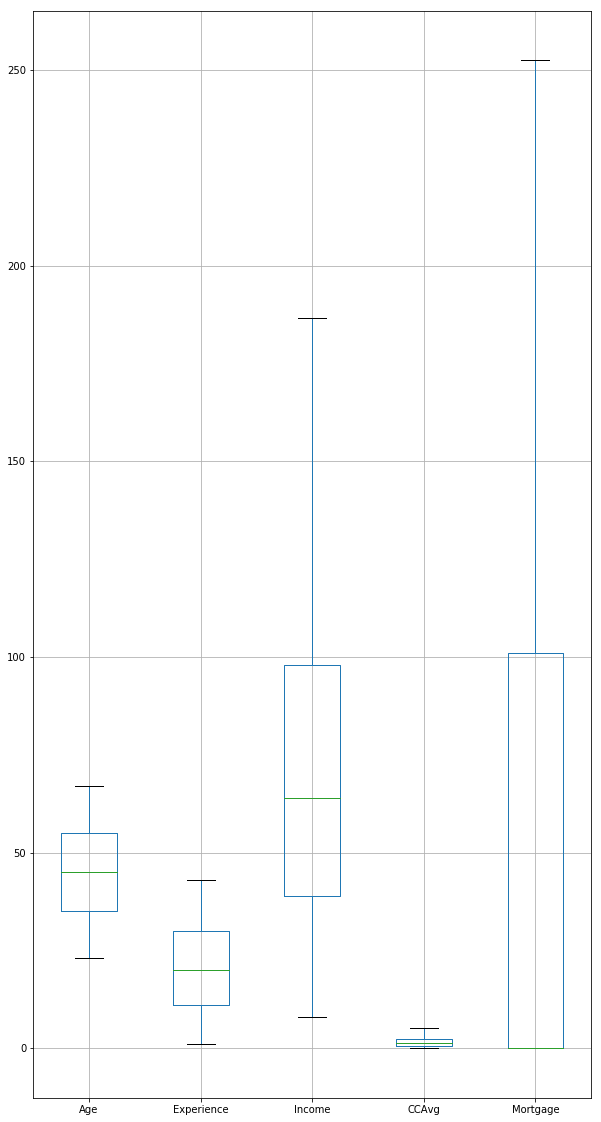

In [13]:
bbx = customerdf.boxplot(column=['Age', 'Experience', 'Income','CCAvg','Mortgage'],figsize = (10,20))

In [14]:
customerdf.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.398600,73.617400,93152.503000,2.396400,1.831338,1.881000,50.494700,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.175182,45.626122,2121.852197,1.147663,1.452215,0.839869,83.005401,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,1.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,186.500000,96651.000000,4.000000,5.200000,3.000000,252.500000,1.000000,1.000000,1.00000,1.000000,1.000000


In [15]:
# Question 3 : Get the target column distribution. Your comments?

customerdf["Personal Loan"].value_counts()
# This is an imbalanced data set. This has significantly more number of data points for "No personal loan" class.
# Any algorithm used will be good at identifying cutomers who will not avail personal loan.
# 

0    4520
1     480
Name: Personal Loan, dtype: int64

In [16]:
#Question 4 : Split the data into training and test set in the ratio of 70:30 respectively

X = customerdf.drop(["Personal Loan","ID","ZIP Code","Age"],axis = 1) # Dropping Age too as Age is highly corelated with Income.
Y = customerdf["Personal Loan"]

#Split data in train & test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1,stratify=Y)

#Data standardisation using Zscore
from scipy.stats import zscore 
X_train_z = X_train.apply(zscore) # converting to Z score
X_test_z = X_test.apply(zscore)

In [17]:
#Question 5 : Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a 
#liability customer buying personal loans (15 points)

#Using KNN 
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3, weights = 'uniform', metric='euclidean')
NNH.fit(X_train_z,Y_train)
KNN_score_train = NNH.score(X_train_z,Y_train)
print("KNN Accuracy score - train", KNN_score_train)
KNN_score_test = NNH.score(X_test_z,Y_test)
print("KNN Accuracy score - test", KNN_score_test)
from sklearn import metrics
YPredict = NNH.predict(X_test_z)
print("KNN Confusion Matrix - test\n", metrics.confusion_matrix(Y_test, YPredict))
print(metrics.classification_report(Y_test, YPredict))



KNN Accuracy score - train 0.9808571428571429
KNN Accuracy score - test 0.9633333333333334
KNN Confusion Matrix - test
 [[1348    8]
 [  47   97]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.92      0.67      0.78       144

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.95      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500



In [18]:
for i in range(3,3500,1):
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'uniform', metric='euclidean' )
    NNH.fit(X_train_z, Y_train)
    predicted_labels = NNH.predict(X_test_z)
    print("accuracy score with k =", i, "is",NNH.score(X_test_z, Y_test))
    print(metrics.confusion_matrix(Y_test, predicted_labels))
    
# Attempt to select better k value. Howewver, as the k value is increasing , we see that recall parameter of the model 
#is becoming 0. So, chossing k as 3.


accuracy score with k = 3 is 0.9633333333333334
[[1348    8]
 [  47   97]]
accuracy score with k = 4 is 0.9533333333333334
[[1353    3]
 [  67   77]]
accuracy score with k = 5 is 0.958
[[1351    5]
 [  58   86]]
accuracy score with k = 6 is 0.948
[[1352    4]
 [  74   70]]
accuracy score with k = 7 is 0.9526666666666667
[[1350    6]
 [  65   79]]
accuracy score with k = 8 is 0.9446666666666667
[[1352    4]
 [  79   65]]
accuracy score with k = 9 is 0.9473333333333334
[[1351    5]
 [  74   70]]
accuracy score with k = 10 is 0.942
[[1351    5]
 [  82   62]]
accuracy score with k = 11 is 0.9466666666666667
[[1351    5]
 [  75   69]]
accuracy score with k = 12 is 0.9453333333333334
[[1353    3]
 [  79   65]]
accuracy score with k = 13 is 0.9466666666666667
[[1351    5]
 [  75   69]]
accuracy score with k = 14 is 0.9453333333333334
[[1353    3]
 [  79   65]]
accuracy score with k = 15 is 0.9513333333333334
[[1353    3]
 [  70   74]]
accuracy score with k = 16 is 0.9493333333333334
[[1354   

accuracy score with k = 119 is 0.926
[[1356    0]
 [ 111   33]]
accuracy score with k = 120 is 0.924
[[1356    0]
 [ 114   30]]
accuracy score with k = 121 is 0.9246666666666666
[[1356    0]
 [ 113   31]]
accuracy score with k = 122 is 0.924
[[1356    0]
 [ 114   30]]
accuracy score with k = 123 is 0.924
[[1356    0]
 [ 114   30]]
accuracy score with k = 124 is 0.9233333333333333
[[1356    0]
 [ 115   29]]
accuracy score with k = 125 is 0.924
[[1356    0]
 [ 114   30]]
accuracy score with k = 126 is 0.924
[[1356    0]
 [ 114   30]]
accuracy score with k = 127 is 0.924
[[1356    0]
 [ 114   30]]
accuracy score with k = 128 is 0.9233333333333333
[[1356    0]
 [ 115   29]]
accuracy score with k = 129 is 0.9233333333333333
[[1356    0]
 [ 115   29]]
accuracy score with k = 130 is 0.9233333333333333
[[1356    0]
 [ 115   29]]
accuracy score with k = 131 is 0.9233333333333333
[[1356    0]
 [ 115   29]]
accuracy score with k = 132 is 0.9233333333333333
[[1356    0]
 [ 115   29]]
accuracy scor

KeyboardInterrupt: 

In [19]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_z,Y_train)
logistic_score_train = model.score(X_train_z,Y_train)
print("Logistic Accuracy score - train", logistic_score_train)
logistic_score_test = model.score(X_test_z,Y_test)
print("Logistic Accuracy score - test", logistic_score_test)
Logistic_YPredict = model.predict(X_test_z)
print("Logistic Confusion Matrix - test\n", metrics.confusion_matrix(Y_test, Logistic_YPredict))
print(metrics.classification_report(Y_test, Logistic_YPredict))



Logistic Accuracy score - train 0.9557142857142857
Logistic Accuracy score - test 0.952
Logistic Confusion Matrix - test
 [[1337   19]
 [  53   91]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.63      0.72       144

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.89      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



C:\Users\Aadee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(X_train_z,Y_train)
naive_score_train = naive_model.score(X_train_z,Y_train)
print("NaiveBayes Accuracy score - train", naive_score_train)
naive_score_test = naive_model.score(X_test_z,Y_test)
print("NaiveBayes Accuracy score - test", naive_score_test)
naive_model_YPredict = naive_model.predict(X_test_z)
print("NaiveBayes Confusion Matrix - test\n", metrics.confusion_matrix(Y_test, naive_model_YPredict))
print(metrics.classification_report(Y_test, naive_model_YPredict))


NaiveBayes Accuracy score - train 0.9
NaiveBayes Accuracy score - test 0.9053333333333333
NaiveBayes Confusion Matrix - test
 [[1258   98]
 [  44  100]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1356
           1       0.51      0.69      0.58       144

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.74      0.81      0.77      1500
weighted avg       0.92      0.91      0.91      1500



In [ ]:
# Conclusion :

# KNN -  KNN provides highest model accuracy of ~96%. But when we see the confusion matrix, recall for our class of interest,
# which is 1 is 67% compared to Naive Bayes's 69%. KNN also gives very good recall & precision for class 0 i.e no personal loan cutomers,
#But , this is not our class of interest.However, when we look at precision for class 1, it is ~92%.

#Logistic regression - This model also has a very good accuracy of ~95%. But when we see confusion matrix,recall for our 
#class of interest, i.e personal loan customers,is ~63% compared to 69% to Naive Bayes model. However, when we look at precision,
# Logistic regresssion model is providing a better result compared to Naive Bayes.

#NaiveBayes : Naive Bayes model accuracy may be less compared to KNN & logistic. But when we look at the parameter of interest,
# which is , how good is the model predicting a Actual Personal loan customer as a personal loan customer(recall),output of this
# algorithm with a recall rate of 100 out of 144, stands out. Howewver, Precision of this model is just better than random chance.

# Out of these 3 models, choosing KNN which has highest overall model accuracy & better recall & precision too when 
# compared with logistic & NaiveBayes.  However, Recall rate of Naive Bayes is debatable compared to other 2 models.